In [67]:
using LowLevelFEM
import LowLevelFEM as FEM
gmsh.initialize()

In [68]:
l = 100
n = 100

100

In [69]:
gmsh.parser.setNumber("length", [l])
gmsh.parser.setNumber("elements", [n])

In [70]:
gmsh.merge("rod.geo")

Info    : Reading 'rod.geo'...
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 60%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.000367031s, CPU 0.000331s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Transfinite)
Info    : Done meshing 2D (Wall 0.000631039s, CPU 0.000603s)
Info    : 202 nodes 306 elements
Info    : Done reading 'rod.geo'


In [71]:
mat = FEM.material("body", E=2e5, ν=0)
problem = FEM.Problem([mat], type=:PlaneStress, bandwidth=:RCMK)

Info    : RCMK renumbering...
Info    : Done RCMK renumbering (bandwidth is now 3)


LowLevelFEM.Problem("rod", :PlaneStress, 2, 2, LowLevelFEM.Material[LowLevelFEM.Material("body", 200000.0, 0.0, 7.85e-9, 45.0, 4.2e8, 1.2e-5)], 1.0, 202)

In [72]:
supp1 = FEM.displacementConstraint("left", ux=0)
supp2 = FEM.displacementConstraint("bottom", uy=0)
supp3 = FEM.displacementConstraint("right", ux=0)

("right", 0, 0 + 1im, 0 + 1im)

In [73]:
#load = FEM.load("right", fx=1)
#u = FEM.solveDisplacement(problem, [load], [supp1, supp2])
#FEM.showDoFResults(problem, u, :ux, visible=true)

In [74]:
K = FEM.stiffnessMatrix(problem)

404×404 SparseArrays.SparseMatrixCSC{Float64, Int64} with 4757 stored entries:
⎡⠻⣦⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠙⢻⣶⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠉⢻⣶⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠉⢻⣶⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠈⢿⣷⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢿⣷⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠿⣧⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠿⣧⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠿⣧⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠻⣦⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠻⣦⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⢻⣶⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⢻⣶⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⢻⣶⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢿⣷⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢿⣷⡀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠿⣧⣀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠿⣧⣀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠿⣧⣄⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠻⣦⎦

In [75]:
M = FEM.massMatrix(problem)

404×404 SparseArrays.SparseMatrixCSC{Float64, Int64} with 404 stored entries:
⎡⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⎦

In [76]:
Tmin = FEM.smallestPeriodTime(K, M)

6.224001709051467e-7

In [77]:
u0 = FEM.initialDisplacement(problem, "body", ux=0, uy=0);

In [78]:
v0 = FEM.initialVelocity(problem, "body", vx=1000)
FEM.initialVelocity!(problem, "right", v0, vx=0)

In [79]:
ωₘₐₓ = 2π / Tmin
C = FEM.dampingMatrix(K, M, ωₘₐₓ, ξ=0);

In [80]:
dummyLoad = FEM.load("right", fx=0)
f = FEM.loadVector(problem, [dummyLoad]);

In [81]:
FEM.applyBoundaryConditions!(problem, K, M, C, f, [supp2, supp3]);

In [82]:
Δt = Tmin / π
c = √(problem.material[1].E / problem.material[1].ρ);
T = 2l / c;

In [83]:
u, v, t = FEM.CDM(K, M, C, f, u0, v0, T, Δt * 0.5);

In [84]:
elementType, nodeTags, dim, tag = gmsh.model.mesh.getElement(208)
Vector{Int64}(nodeTags)

4-element Vector{Int64}:
 200
 198
 197
 199

In [85]:
S0 = FEM.solveStress(problem, u);

In [86]:
S = FEM.solveStress(problem, u, DoFResults=true)

1818×401 Matrix{Float64}:
 0.0  -19.8116  -34.6703       -42.0997       …  -17.6178       -12.6714
 0.0    0.0      -6.55032e-15   -2.08722e-14       3.93019e-14    6.33937e-14
 0.0    0.0       0.0            0.0               0.0            0.0
 0.0    0.0      -6.55032e-15   -2.08722e-14       3.93019e-14    6.33937e-14
 0.0    0.0      -8.88178e-15   -2.93099e-14       1.64313e-14    4.71179e-13
 0.0    0.0       0.0            0.0          …    0.0            0.0
 0.0    0.0       0.0            0.0               0.0            0.0
 0.0    0.0       0.0            0.0               0.0            0.0
 0.0    0.0       0.0            0.0               0.0            0.0
 0.0  -19.8116  -34.6703       -42.0997          -17.6178       -12.6714
 ⋮                                            ⋱                   ⋮
 0.0    0.0       0.0            0.0               1.62781        0.816076
 0.0    0.0       0.0            0.0          …   -2.54788e-13    2.09734e-12
 0.0    0.0       0.0  

In [87]:
S = FEM.elementsToNodes(problem, S0)

1818×401 Matrix{Float64}:
 0.0  -19.8116  -34.6703       -42.0997       …  -17.6178       -12.6714
 0.0    0.0      -6.55032e-15   -2.08722e-14       3.93019e-14    6.33937e-14
 0.0    0.0       0.0            0.0               0.0            0.0
 0.0    0.0      -6.55032e-15   -2.08722e-14       3.93019e-14    6.33937e-14
 0.0    0.0      -8.88178e-15   -2.93099e-14       1.64313e-14    4.71179e-13
 0.0    0.0       0.0            0.0          …    0.0            0.0
 0.0    0.0       0.0            0.0               0.0            0.0
 0.0    0.0       0.0            0.0               0.0            0.0
 0.0    0.0       0.0            0.0               0.0            0.0
 0.0  -19.8116  -34.6703       -42.0997          -17.6178       -12.6714
 ⋮                                            ⋱                   ⋮
 0.0    0.0       0.0            0.0               1.62781        0.816076
 0.0    0.0       0.0            0.0          …   -2.54788e-13    2.09734e-12
 0.0    0.0       0.0  

In [88]:
sx = FEM.showDoFResults(problem, S, :sx, t=t);

In [89]:
psx = FEM.plotOnPath(problem, "path", sx, points=n + 1, visible=true)
psx2, xy = FEM.plotOnPath(problem, "path", sx, points=(n + 1) * 10, step=length(t) ÷ 4, plot=true);

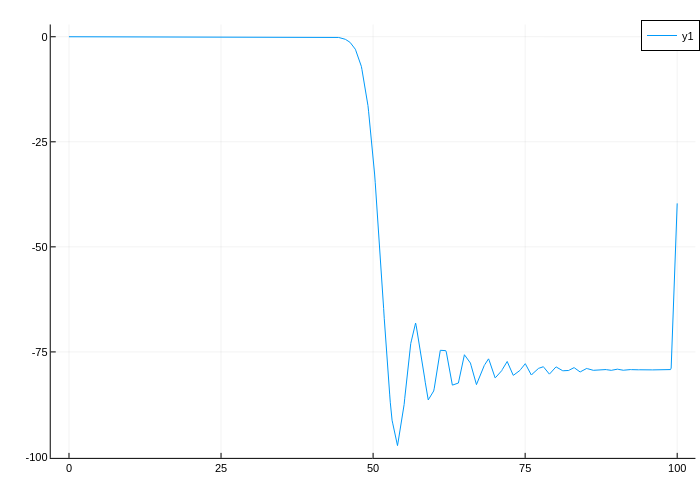

In [90]:
#using Plots
#plotlyjs()
plot(xy)

In [91]:
c * Tmin

3.141592653589787

In [92]:
length(t)

401

In [93]:
Φ = FEM.solveModalAnalysis(problem, constraints=[supp1, supp2], n=301)
f = Φ.f

301-element Vector{Float64}:
  12618.732103240263
  37853.0163645935
  63077.08029493838
  88288.43541077037
 113475.94594849648
 138640.35650308355
 163772.1976289766
 188881.61523203354
 213917.4263652222
 238872.56401298338
      ⋮
      1.59245765361034e6
      1.595546523865315e6
      1.5979664863480087e6
      1.6004660125595552e6
      1.6024072586133357e6
      1.6027261385734812e6
      1.604302172558291e6
      1.6055774033614006e6
      1.613746160419994e6

In [94]:
Φ.ϕ' * Φ.ϕ

301×301 Matrix{Float64}:
  1.0           0.0098998    -0.00990117   …  -0.0120398   0.000217536
  0.0098998     1.0          -0.00990888      -0.0120398   0.000217683
 -0.00990117   -0.00990888    1.0              0.0120383  -0.000217921
  0.00989967    0.00989756   -0.00983723      -0.0120391   0.000218705
 -0.00990218   -0.00989917    0.00985926       0.0120416  -0.000217276
 -0.00990477   -0.00990261    0.0098843    …   0.0120461  -0.000220668
 -0.00990144   -0.00990422    0.00991896       0.0120338  -0.000220102
 -0.00989875   -0.00989987    0.00990424       0.0120416  -0.000221107
 -0.009928     -0.00992676    0.00992016       0.0120712  -0.000219759
  0.00993927    0.00993999   -0.00994131      -0.0120847   0.000219018
  ⋮                                        ⋱               ⋮
  0.0115026     0.0115027    -0.0115006       -0.0379889   0.0116962
  0.0100065     0.0100066    -0.0100052       -0.010015   -0.000149197
  0.00617662    0.00617864   -0.00617497      -0.0117347   0.013

In [95]:
q = Φ.ϕ' * u

301×401 Matrix{Float64}:
 0.0   0.0012451     0.00248528    0.00371684   …   0.00132285    9.74854e-5
 0.0  -0.000428107  -0.000861137  -0.00130278      -0.000350991   9.69723e-5
 0.0  -0.000241015  -0.000477117  -0.000704632     -0.000316948  -9.59761e-5
 0.0  -0.000188979  -0.000382857  -0.000585283     -0.000114968   9.43988e-5
 0.0  -0.000129317  -0.000253754  -0.000369688     -0.000200903  -9.23785e-5
 0.0   0.000123626   0.000252109   0.000389036  …   5.53417e-5   -8.97032e-5
 0.0  -8.63373e-5   -0.000167849  -0.00024099      -0.000150724  -8.64531e-5
 0.0   9.31758e-5    0.000191143   0.000297394      3.37402e-5   -8.24318e-5
 0.0  -6.3262e-5    -0.000121757  -0.000172039     -0.000117335  -7.80911e-5
 0.0  -7.52993e-5   -0.000155327  -0.00024347      -2.81388e-5    7.2499e-5
 ⋮                                              ⋱                 ⋮
 0.0  -1.13139e-5   -1.73377e-5   -1.6469e-5       -3.79882e-6   -1.51298e-6
 0.0  -8.75923e-6   -1.26796e-5   -1.04487e-5      -2.45799e-

In [96]:
#anim = @animate for i ∈ 1:400
#    plot(Φ.f, abs.(q[:, i]))
#end
#mp4(anim, "anim_modal.mp4", fps=15)

In [97]:
gmsh.fltk.openTreeItem("0Modules/Post-processing")

-------------------------------------------------------
Version       : 4.13.1
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 19700101
Build host    : amdci7.julia.csail.mit.edu
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blossom Cairo DIntegration Dlopen DomHex Eigen[contrib] Fltk GMP Gmm[contrib] Hxt Jpeg Kbipack LinuxJoystick MathEx[contrib] Mesh Metis[contrib] Mmg Mpeg Netgen Nii2mesh ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR TinyXML2[contrib] Untangle Voro++[contrib] WinslowUntangler Zlib
FLTK version  : 1.3.8
OCC version   : 7.7.2
Packaged by   : root
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------


In [98]:
gmsh.fltk.run()

XRequest.18: BadValue 0x0


In [99]:
gmsh.finalize()